<a href="https://colab.research.google.com/github/LeeTae-hyun/GIS_Python/blob/master/Lab0_BasicPython2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**유임 승차 비율이 가장 높은 역 찾기**

1. 대중교통 데이터 내려받기
- 수도권 대중교통 데이터는 티머니에서 제공함 (https://www.t-money.co.kr/ncs/pct/ugd/ReadTrcrStstList.dev)
- 월간 교통카드 통계자료 게시글에서 엑셀 내려받기

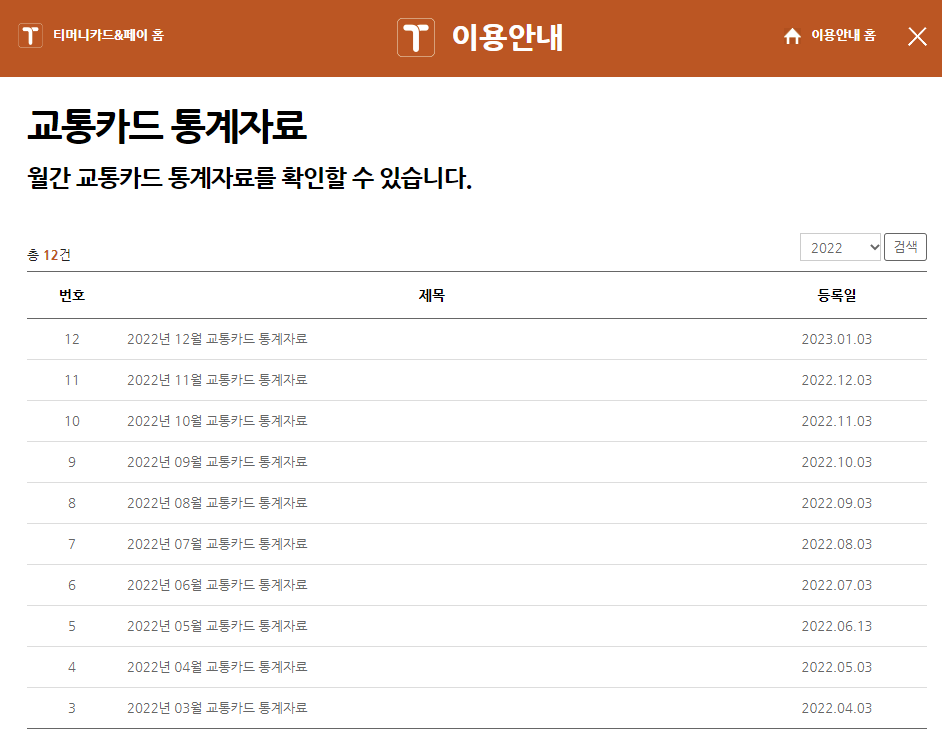

- '지하철 유무임별 이용현황' 탭 선택 후 CSV 형태로 저장

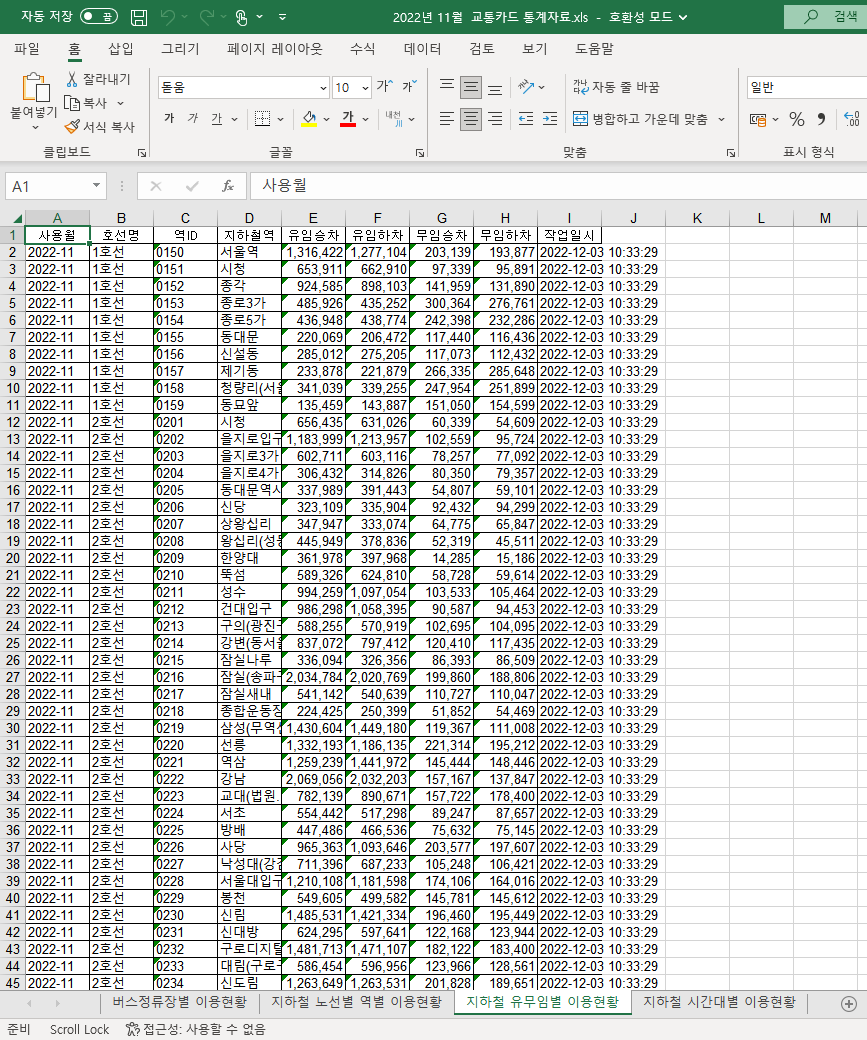

- 불필요한 콤마 삭제 및 작업일시열 삭제

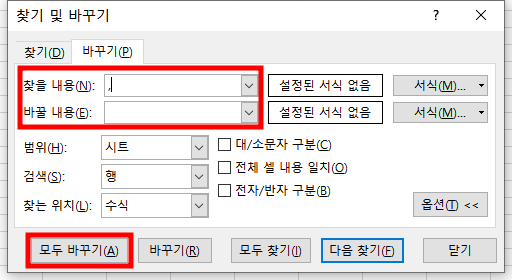

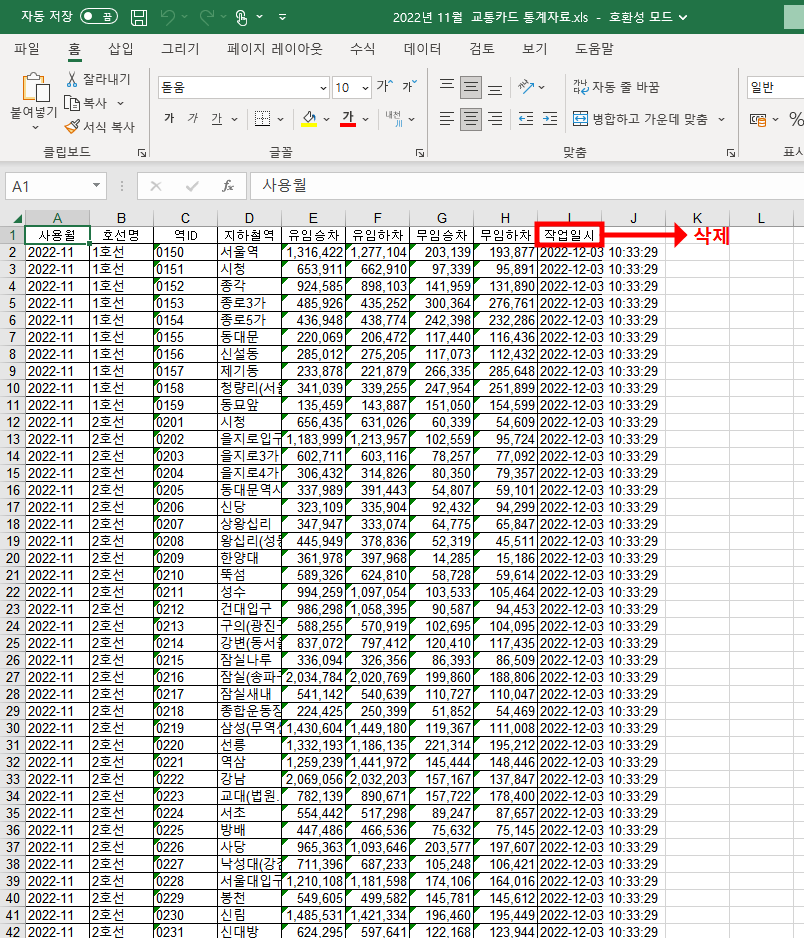

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 확인
import csv
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)

for row in data :
  print(row)

['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2022-12', '1호선', '0150', '서울역', '1350791', '1316828', '196523', '187268']
['2022-12', '1호선', '0151', '시청', '672846', '665583', '96623', '93198']
['2022-12', '1호선', '0152', '종각', '975925', '949944', '150911', '141309']
['2022-12', '1호선', '0153', '종로3가', '490967', '450017', '309071', '287432']
['2022-12', '1호선', '0154', '종로5가', '476315', '470710', '247835', '238588']
['2022-12', '1호선', '0155', '동대문', '230076', '215833', '120749', '118870']
['2022-12', '1호선', '0156', '신설동', '288269', '277560', '114634', '110172']
['2022-12', '1호선', '0157', '제기동', '238529', '228924', '257360', '275606']
['2022-12', '1호선', '0158', '청량리(서울시립대입구)', '344620', '342766', '242950', '245420']
['2022-12', '1호선', '0159', '동묘앞', '134207', '141805', '137351', '139883']
['2022-12', '2호선', '0201', '시청', '682510', '621289', '59541', '53179']
['2022-12', '2호선', '0202', '을지로입구', '1330792', '1341875', '112244', '104953']
['2022-12', '2호선', '0203', '을지로3가'

In [ ]:
# 데이터 정제
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)

for i in range(4,7) :
  row[i] = int(row[i])
print(row)

['2022-12', '신림선', '4411', '관악산(서울대)', 46924, 47372, 22535, 22796]


In [ ]:
# 유임승차에서 무임승차 나눈 값
# rate = 유임승차인원 / 무임승차인원
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
for row in data :
  for i in range(4,8) :
    row[i] = int(row[i])
  rate = row[4] / row[6]
  if rate > mx :
    mx = rate
print(mx)

ZeroDivisionError: ignored

In [ ]:
# 0인 값 출력
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)

if row[6] == 0 :
  print(row)

['2022-12', '일산선', '1949', '지축', 14, 0, 0, 0]


In [ ]:
# rate가 가장 높은 역이 어디인지, 비율은 어떤지 확인
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)
next(data)

if row[6] != 0 :                  # 만약 row[6](무임승차인원) 값이 0이 아니라면
  rate = row[4] / row[6]          # 유임승차인원 / 무임승차인원
  if rate > mx :                  # 만약 rate 값이 mx 값보다 크다면
    mx = rate                     # mx값을 rate 값으로 업데이트
    print(row, round(rate,2))     # 업데이트 값 출력

In [ ]:
# 유임승차 비율이 가장 높은 역 찾기
f = open('/content/drive/MyDrive/Geopy/subfree.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0
mx_station = ''

for row in data :
  for i in range(4,8) :
    row[i] = int(row[i])
  if row[6] != 0 and (row[4]+row[6]) > 10000 :
    rate = row[4] / (row[4] + row[6])
    if rate > mx :
      mx = rate
      mx_station = row[3] + ' ' + row[1]

print(mx_station, round(mx*100,2))


한양대 2호선 95.72
